In [131]:

import pandas as pd
import numpy as np
import requests
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image
from functools import reduce
import re
import seaborn as sns
import datetime

In [132]:
#------------------------------------------ Data Gathering-----------

# Gathering Data

In [133]:
# Open the csv file(from the class)
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [134]:

# Open the Image file(from the class)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(image_request.content)
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')


In [135]:
# Open the Twitter from file(from the class as there is no access for twitter DEV)
df_tweet_json = pd.read_json("tweet-json.txt" , lines=True)

In [136]:

df_tweet_json = df_tweet_json[['id', 'favorite_count','retweet_count']]

#Im doing this step to make sure that i have uniqe column for data merge with the same name
df_tweet_json= df_tweet_json.rename(columns={'id':'tweet_id'})



# Assessing Data

In [137]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [138]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [139]:
df_twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Berkeley      1
Ace           1
Craig         1
Buddah        1
Butters       1
Name: name, Length: 957, dtype: int64

In [140]:
df_twitter_archive.nunique()


tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [141]:
df_twitter_archive[["doggo" , "floofer" , "pupper" , "puppo"] ].describe()

,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,None,None,None,None
freq,2259,2346,2099,2326


In [142]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [143]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [144]:
df_image_predictions.value_counts()

tweet_id            jpg_url                                          img_num  p1                      p1_conf   p1_dog  p2                           p2_conf   p2_dog  p3                        p3_conf   p3_dog
666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg  1        Welsh_springer_spaniel  0.465074  True    collie                       0.156665  True    Shetland_sheepdog         0.061428  True      1
761292947749015552  https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg  1        standard_poodle         0.660893  True    Samoyed                      0.314886  True    miniature_poodle          0.008834  True      1
767122157629476866  https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg  2        toy_poodle              0.873841  True    miniature_poodle             0.059192  True    Irish_terrier             0.035306  True      1
766793450729734144  https://pbs.twimg.com/media/CqQykxrWYAAlD8g.jpg  1        beagle                  0.451697  True    basset                   

In [145]:
df_image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [146]:
df_tweet_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [147]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [148]:
df_tweet_json.nunique()

tweet_id          2354
favorite_count    2007
retweet_count     1724
dtype: int64

In [149]:
#------Required clean----
#1-change timesatmp columns
#2-clean source columns
#3-dog stage
#4-Drop retweets
#5-Drop replies
#6-remove unneeded columns
#7- rename columns
#8- fix rating

# Tidiness Issues
Merging the three dataframes, using the common tweet_id

The puppo/doggo/floofer/pupper terms should be in one column

# Make copy and merge data for start cleaning

In [150]:
df_twitter_archive_clean = df_twitter_archive.copy()
df_tweet_json_clean = df_tweet_json.copy()
df_image_predictions_clean = df_image_predictions.copy()

In [151]:
df1=df_twitter_archive_clean.merge(df_image_predictions_clean , how='inner' , on='tweet_id')
df=df1.merge(df_tweet_json_clean , how='inner' , on='tweet_id')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

# Cleaning Data

Define

In [153]:
#1-change timesatmp columns as the timestamp should be datetime

Code

In [154]:
df['timestamp']=pd.to_datetime(df['timestamp'])

Test

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

Define

In [156]:
#extract year, month and day to new columns and delete timesatmp colums

Code

In [157]:

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day

In [158]:
df = df.drop('timestamp', 1)

Test

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   source                      2073 non-null   object 
 4   text                        2073 non-null   object 
 5   retweeted_status_id         79 non-null     float64
 6   retweeted_status_user_id    79 non-null     float64
 7   retweeted_status_timestamp  79 non-null     object 
 8   expanded_urls               2073 non-null   object 
 9   rating_numerator            2073 non-null   int64  
 10  rating_denominator          2073 non-null   int64  
 11  name                        2073 non-null   object 
 12  doggo                       2073 non-null   object 
 13  floofer                     2073 

Define

In [160]:
#2-clean source columns

Code

In [161]:
df['source'] = df['source'].str.extract(">(\w+\D+)</a>")

Test

In [162]:
df['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   source                      2073 non-null   object 
 4   text                        2073 non-null   object 
 5   retweeted_status_id         79 non-null     float64
 6   retweeted_status_user_id    79 non-null     float64
 7   retweeted_status_timestamp  79 non-null     object 
 8   expanded_urls               2073 non-null   object 
 9   rating_numerator            2073 non-null   int64  
 10  rating_denominator          2073 non-null   int64  
 11  name                        2073 non-null   object 
 12  doggo                       2073 non-null   object 
 13  floofer                     2073 

Define

In [164]:
#check the doggo column values
df['doggo'].value_counts()

None     1993
doggo      80
Name: doggo, dtype: int64

In [165]:
# check the floofer column values
df['floofer'].value_counts()

None       2065
floofer       8
Name: floofer, dtype: int64

In [166]:
# check the pupper column values
df['pupper'].value_counts()

None      1852
pupper     221
Name: pupper, dtype: int64

In [167]:
# check the puppo column values
df['puppo'].value_counts()

None     2049
puppo      24
Name: puppo, dtype: int64

Code

In [181]:
df.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1688
1,,,,puppo,22
2,,,pupper,,203
3,,floofer,,,7
4,doggo,,,,63
5,doggo,,,puppo,1
6,doggo,,pupper,,9
7,doggo,floofer,,,1


In [182]:
df['stage'] = df.doggo + df.floofer + df.pupper + df.puppo

In [183]:
df['stage'] = df.doggo + df.floofer + df.pupper + df.puppo
df.loc[df.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df.loc[df.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df.loc[df.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [184]:
df.doggo.replace('None', '', inplace=True)
df.doggo.replace(np.NaN, '', inplace=True)

In [185]:
df.floofer.replace('None', '', inplace=True)
df.floofer.replace(np.NaN, '', inplace=True)

In [186]:
df.pupper.replace('None', '', inplace=True)
df.pupper.replace(np.NaN, '', inplace=True)

In [187]:
df.puppo.replace('None', '', inplace=True)
df.puppo.replace(np.NaN, '', inplace=True)

Test

In [188]:
df['stage'].value_counts()

                  1688
pupper             203
doggo               63
puppo               22
doggo, pupper        9
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

Define

In [189]:
#4-Drop retweets

In [190]:
df['retweeted_status_id'].value_counts().sum()

0

Code

In [191]:

df.drop(df[df["retweeted_status_id"].notnull()].index , inplace=True)

Test

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   source                      1994 non-null   object 
 4   text                        1994 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               1994 non-null   object 
 9   rating_numerator            1994 non-null   int64  
 10  rating_denominator          1994 non-null   int64  
 11  name                        1994 non-null   object 
 12  doggo                       1994 non-null   object 
 13  floofer                     1994 

Define

In [193]:
#5-favorite_count & retweet_count change to int

code

In [194]:
df['favorite_count']=df['favorite_count'].astype('int')
df['retweet_count']=df['retweet_count'].astype('int')

test

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   source                      1994 non-null   object 
 4   text                        1994 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               1994 non-null   object 
 9   rating_numerator            1994 non-null   int64  
 10  rating_denominator          1994 non-null   int64  
 11  name                        1994 non-null   object 
 12  doggo                       1994 non-null   object 
 13  floofer                     1994 

Define

In [196]:
#6-remove unneeded columns

Code

In [197]:
df = df.drop(columns=['in_reply_to_status_id',
                                                'in_reply_to_user_id',
                                                'retweeted_status_id',
                                                'retweeted_status_user_id',
                                                'retweeted_status_timestamp',
                                                'expanded_urls',
                                                'jpg_url',
                                                'p2',
                                                'p2_conf',
                                                'p2_dog',
                                                'p3_conf',
                                                'p3_dog',
                                                'p3'])

Test

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   source              1994 non-null   object 
 2   text                1994 non-null   object 
 3   rating_numerator    1994 non-null   int64  
 4   rating_denominator  1994 non-null   int64  
 5   name                1994 non-null   object 
 6   doggo               1994 non-null   object 
 7   floofer             1994 non-null   object 
 8   pupper              1994 non-null   object 
 9   puppo               1994 non-null   object 
 10  img_num             1994 non-null   int64  
 11  p1                  1994 non-null   object 
 12  p1_conf             1994 non-null   float64
 13  p1_dog              1994 non-null   bool   
 14  favorite_count      1994 non-null   int64  
 15  retweet_count       1994 non-null   int64  
 16  year  

Define

In [199]:
#7- rename columns

Code

In [200]:
df.rename(columns={'p1':'prediction', 'p1_conf':'prediction_confidence' ,'p1_dog':'prediction_dog'} , inplace=True)

Test

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   source                 1994 non-null   object 
 2   text                   1994 non-null   object 
 3   rating_numerator       1994 non-null   int64  
 4   rating_denominator     1994 non-null   int64  
 5   name                   1994 non-null   object 
 6   doggo                  1994 non-null   object 
 7   floofer                1994 non-null   object 
 8   pupper                 1994 non-null   object 
 9   puppo                  1994 non-null   object 
 10  img_num                1994 non-null   int64  
 11  prediction             1994 non-null   object 
 12  prediction_confidence  1994 non-null   float64
 13  prediction_dog         1994 non-null   bool   
 14  favorite_count         1994 non-null   int64  
 15  retw

Define

In [202]:
#8-rating

In [207]:
df['rating_numerator'].value_counts()

12       450
10       419
11       396
13       261
9        151
8         95
7         52
14        35
6         32
5         32
3         19
4         16
2          9
1          5
0          2
165        1
143        1
84         1
50         1
420        1
13.5       1
11.26      1
80         1
45         1
24         1
44         1
144        1
11.27      1
88         1
204        1
60         1
121        1
1776       1
99         1
9.75       1
Name: rating_numerator, dtype: int64

Code

In [208]:
rating= df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True).astype('float')
df.rating_numerator = ratings


Test

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   source                 1994 non-null   object 
 2   text                   1994 non-null   object 
 3   rating_numerator       1994 non-null   object 
 4   rating_denominator     1994 non-null   int64  
 5   name                   1994 non-null   object 
 6   doggo                  1994 non-null   object 
 7   floofer                1994 non-null   object 
 8   pupper                 1994 non-null   object 
 9   puppo                  1994 non-null   object 
 10  img_num                1994 non-null   int64  
 11  prediction             1994 non-null   object 
 12  prediction_confidence  1994 non-null   float64
 13  prediction_dog         1994 non-null   bool   
 14  favorite_count         1994 non-null   int64  
 15  retw

In [210]:
df['rating_numerator'].value_counts()

12       450
10       419
11       396
13       261
9        151
8         95
7         52
14        35
6         32
5         32
3         19
4         16
2          9
1          5
0          2
165        1
143        1
84         1
50         1
420        1
13.5       1
11.26      1
80         1
45         1
24         1
44         1
144        1
11.27      1
88         1
204        1
60         1
121        1
1776       1
99         1
9.75       1
Name: rating_numerator, dtype: int64

Define

In [211]:
# 9 tweet_id: is int, should be type object as no calculation is needed

In [212]:
df['tweet_id']=df['tweet_id'].astype('str')

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   source                 1994 non-null   object 
 2   text                   1994 non-null   object 
 3   rating_numerator       1994 non-null   object 
 4   rating_denominator     1994 non-null   int64  
 5   name                   1994 non-null   object 
 6   doggo                  1994 non-null   object 
 7   floofer                1994 non-null   object 
 8   pupper                 1994 non-null   object 
 9   puppo                  1994 non-null   object 
 10  img_num                1994 non-null   int64  
 11  prediction             1994 non-null   object 
 12  prediction_confidence  1994 non-null   float64
 13  prediction_dog         1994 non-null   bool   
 14  favorite_count         1994 non-null   int64  
 15  retw

Define

In [214]:
#10 correct missing_names 
df['name'].value_counts()

None        546
a            55
Charlie      11
Cooper       10
Lucy         10
           ... 
Mojo          1
Berkeley      1
Ace           1
Craig         1
Butters       1
Name: name, Length: 936, dtype: int64

Code

In [235]:
df['name'] = df['name'].str.replace('^[a-z]+', 'None')


<ipython-input-235-1aacadb853ec>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df['name'].str.replace('^[a-z]+', 'None')


Test

In [216]:
df['name'].value_counts()

None        644
Charlie      11
Lucy         10
Cooper       10
Oliver       10
           ... 
Mojo          1
Caryl         1
Berkeley      1
Ace           1
Kawhi         1
Name: name, Length: 914, dtype: int64

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   source                 1994 non-null   object 
 2   text                   1994 non-null   object 
 3   rating_numerator       1994 non-null   object 
 4   rating_denominator     1994 non-null   int64  
 5   name                   1994 non-null   object 
 6   doggo                  1994 non-null   object 
 7   floofer                1994 non-null   object 
 8   pupper                 1994 non-null   object 
 9   puppo                  1994 non-null   object 
 10  img_num                1994 non-null   int64  
 11  prediction             1994 non-null   object 
 12  prediction_confidence  1994 non-null   float64
 13  prediction_dog         1994 non-null   bool   
 14  favorite_count         1994 non-null   int64  
 15  retw

In [218]:
df.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,img_num,prediction,prediction_confidence,prediction_dog,favorite_count,retweet_count,year,month,day,stage
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,,1,orange,0.097049,False,39467,8853,2017,8,1,
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,1,Chihuahua,0.323581,True,33819,6514,2017,8,1,
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,1,Chihuahua,0.716012,True,25461,4328,2017,7,31,
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,,1,paper_towel,0.170278,False,42908,8964,2017,7,30,
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,2,basset,0.555712,True,41048,9774,2017,7,29,


In [219]:
#Validation
df[df.duplicated()].sum()

tweet_id                 0.0
source                   0.0
text                     0.0
rating_numerator         0.0
rating_denominator       0.0
name                     0.0
doggo                    0.0
floofer                  0.0
pupper                   0.0
puppo                    0.0
img_num                  0.0
prediction               0.0
prediction_confidence    0.0
prediction_dog           0.0
favorite_count           0.0
retweet_count            0.0
year                     0.0
month                    0.0
day                      0.0
stage                    0.0
dtype: float64

In [220]:
###--export the data----

In [221]:
df.to_csv('twitter_archive_master.csv', encoding='utf-8' , index=False)

In [222]:
df2=pd.read_csv('twitter_archive_master.csv')

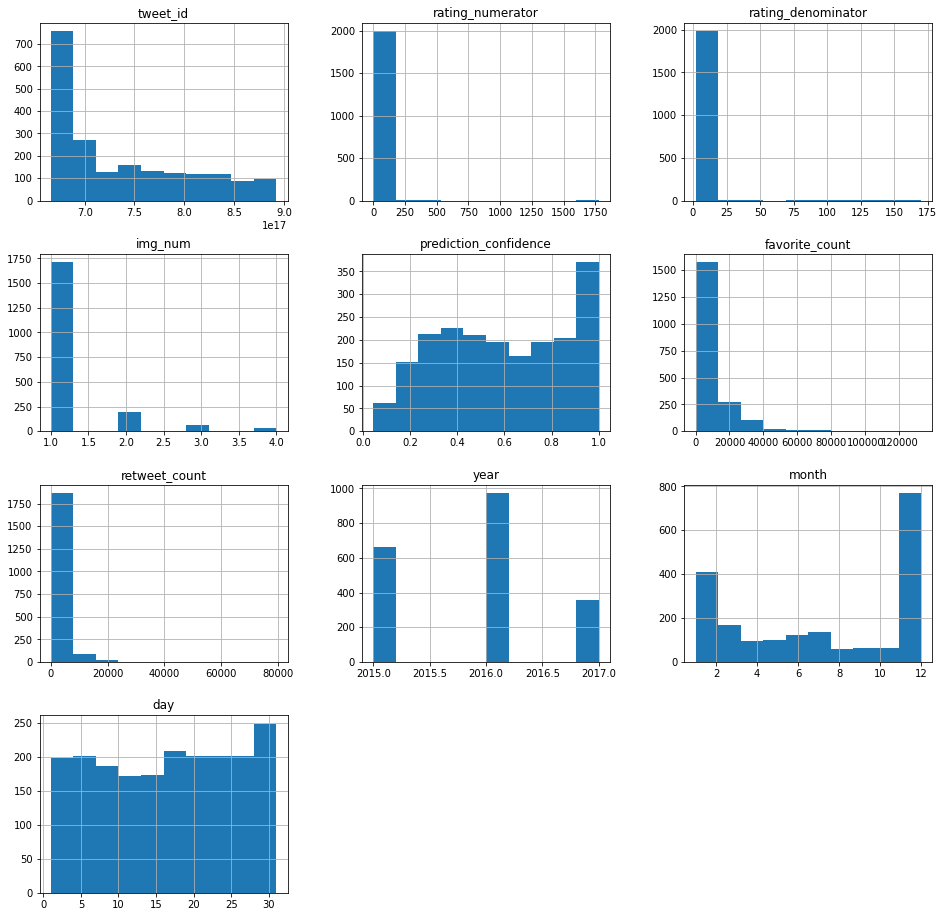

In [223]:
df2.hist(figsize=(16,16));

Text(0, 0.5, 'img_num')

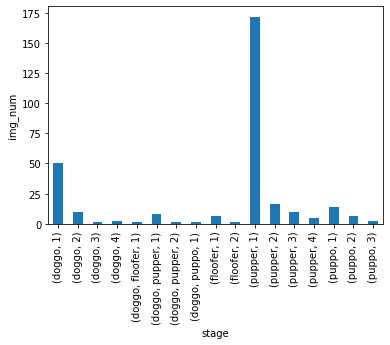

In [224]:
count = df2.groupby(['stage','img_num']).favorite_count.count()
count.plot(kind='bar')
plt.xlabel('stage')
plt.ylabel('img_num')

Text(0, 0.5, 'Count_of_tweet')

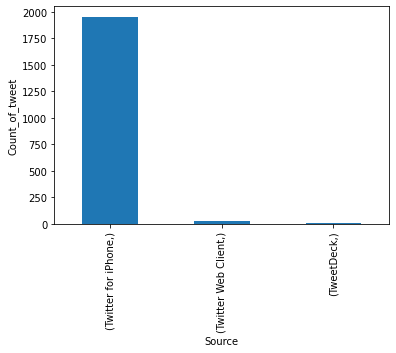

In [225]:
df4=df2.loc[ : ,['source']].value_counts()
df4.plot(kind='bar')
plt.xlabel('Source')
plt.ylabel('Count_of_tweet')

In [226]:
view_year = df2.loc[ : , ['year']]

In [227]:
df6=view_year.value_counts()

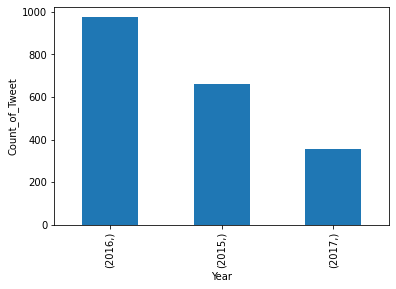

In [228]:
df6.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count_of_Tweet');

In [229]:
view_year_source = df2.loc[ : , ['year' ,'source']]

In [230]:
df7=view_year_source.value_counts()

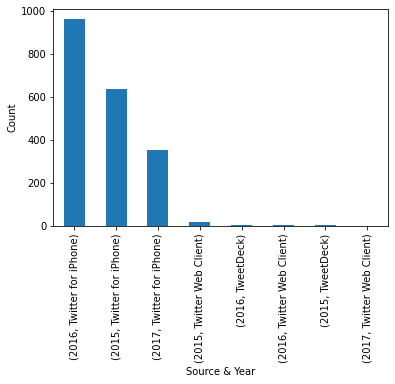

In [231]:
df7.plot(kind='bar')
plt.xlabel('Source & Year')
plt.ylabel('Count');